# MMSE linear miexed model and save

In [ ]:
import mixed_lm
mixed_lm.mixed_gmv()
mixed_lm.mixed_ct()

# Analysis linear mixed model

In [9]:
import mixed_lm
# load models (one ROI per model)
gmv_models = mixed_lm.load_models('./results/mixedLM/gmv')
ct_models = mixed_lm.load_models('./results/mixedLM/ct')

In [18]:
gmv_tvalues, gmv_pvalues = mixed_lm.get_stats(gmv_models, i=8, p=0.05, correction=False)
dic2=dict(sorted(gmv_tvalues.items(),key= lambda x:x[1]))

In [23]:
ct_tvalues, ct_pvalues = mixed_lm.get_stats(ct_models, i=8, p=0.05, correction=False)
dic2=dict(sorted(ct_tvalues.items(),key= lambda x:x[1]))

In [24]:
dic2

{114: 0,
 161: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 168: 2.0975377610064143,
 50: 2.2188743242187794,
 178: 2.3305907542039126,
 193: 2.3576892851650513,
 167: 2.4754206661023685,
 188: 2.592060428716508,
 10: 2.6602022047372427,
 187: 2.7252448101907674,
 53: 2.880818233002857,
 155: 2.9008836845450805,
 67: 2.9226805958182047,
 120: 2.9268888086406033,
 42: 3.072764843737324,
 189: 3.152600021791701,
 65: 3.1533690359000213,
 162: 3.244418755586321,
 9: 3.2628604801257173,
 119: 3.353300987601501,
 49: 3.377752383554704,
 177: 3.386850445136521,
 54: 3.39063870873317,
 89: 3.442945289198299,
 68: 3.4609052041358224,
 180: 3.464628684709086,
 194: 3.4797298542024073,
 174: 3.753213484885483,
 113: 3.8209487635156485,
 156: 3.837726219373198,
 166: 3.9835563254987334,
 172: 4.049561318336046,
 190: 4.101237900811904,
 204: 4.131095277194871,
 111: 4.24163339292927,
 35: 4.266393157852167,
 165: 4.33699396003989,
 179: 4.344290062201367,
 184: 4.3470393271059695,
 7: 4.371652437847038,
 

In [27]:
ct_pvalues[176]

5.903178996014665e-29

In [2]:
from mask import Mask, NiiMask
# load mask to save values
mask_path = './data/mask/rBN_Atlas_246_1mm.nii'
mask = NiiMask(mask_path)
# ROI is model's eighth variable
stat_position = 8
p = 0.001
correction = True
# Save significant t-map
gmv_tvalues, gmv_pvalues = mixed_lm.get_stats(gmv_models, i=stat_position, p=p, correction=correction)
mixed_lm.save_t_nii(gmv_tvalues, mask, './results/mixedLM/gmv_t.nii')
ct_tvalues, ct_pvalues = mixed_lm.get_stats(ct_models, i=stat_position, p=p, correction=correction)
mixed_lm.save_t_nii(ct_tvalues, mask, './results/mixedLM/ct_t.nii')

# PET: ABeta

In [2]:
stat_position = 8
gmv_tvalues = mixed_lm.get_tvalues(gmv_models, i=stat_position)
ct_tvalues = mixed_lm.get_tvalues(ct_models, i=stat_position)

In [7]:
# abeta PET correlation
import abeta_pet
import draw_results
import utils
import os

out_dir = './results/mixedLM/correlation/2_0'

t, p = abeta_pet.ttest_by_label(2, 0)

es1 = [v for k,v in sorted(gmv_tvalues.items())]
es2 = [v for k,v in sorted(t.items())]

draw_results.plot_correlation_joint(es1, es2,
    't-values of ROI GMV', 't-values of ROI Aβ', fontsize=18, show=False,
    save=True, out_path=os.path.join(out_dir, 'gmv', 'abeta.png'))


es1 = [v for k,v in sorted(ct_tvalues.items()) if int(k)<211]
es2 = [v for k,v in sorted(t.items()) if int(k)<211]

draw_results.plot_correlation_joint(es1, es2,
    't-values of ROI CT', 't-values of ROI Aβ', fontsize=18, show=False,
    save=True, out_path=os.path.join(out_dir, 'ct', 'abeta.png'))

# PET: FDG

In [3]:
import pet_fdg
import draw_results
import utils
import os

out_dir = './results/mixedLM/correlation/2_0'

t, p = pet_fdg.ttest_by_label(2, 0)

es1 = [v for k,v in sorted(gmv_tvalues.items())]
es2 = [v for k,v in sorted(t.items())]

draw_results.plot_correlation_joint(es1, es2,
    't-values of ROI GMV', 't-values of ROI FDG', fontsize=18, show=False,
    save=True, out_path=os.path.join(out_dir, 'gmv', 'FDG.png'))


es1 = [v for k,v in sorted(ct_tvalues.items()) if int(k)<211]
es2 = [v for k,v in sorted(t.items()) if int(k)<211]

draw_results.plot_correlation_joint(es1, es2,
    't-values of ROI CT', 't-values of ROI FDG', fontsize=18, show=False,
    save=True, out_path=os.path.join(out_dir, 'ct', 'FDG.png'))

## PLSR with gene

In [2]:
import gene_analysis
import os
import pickle

n_perm_boot = 5000
n_components = 5
out_dir ='./results/mixedLM/gene'

gmv_plsr = gene_analysis.plsr(gmv_tvalues, n_components=n_components,
                              n_perm=n_perm_boot, n_boot=n_perm_boot,
                              out_path=os.path.join(out_dir, 'plsr_gmv.csv'))
ct_plsr = gene_analysis.plsr(ct_tvalues, n_components=n_components,
                              n_perm=n_perm_boot, n_boot=n_perm_boot,
                              out_path=os.path.join(out_dir, 'plsr_ct.csv'))

with open(os.path.join(out_dir, 'plsr_gmv.pickle'), 'wb') as f:
    pickle.dump(gmv_plsr, f)
with open(os.path.join(out_dir, 'plsr_ct.pickle'), 'wb') as f:
    pickle.dump(ct_plsr, f)

NameError: name 'pickle' is not defined

In [40]:
# Check plsr model
import os
import pickle
result_plsr_dir = './results/mixedLM/gene'
with open(os.path.join(result_plsr_dir, 'plsr_gmv.pickle'), 'rb') as f:
    gmv_plsr = pickle.load(f)
    
print('GMV: variance_explained:{:.4f} ,p:{:.2e}'.format(gmv_plsr.varexp[0] , gmv_plsr.permres.pvals[0]))

GMV: variance_explained:0.2418 ,p:2.00e-04


In [1]:
import datasets
import mixed_lm
centers = datasets.load_centers_all()
all_df = mixed_lm.load_data(centers)
add_df_ct = mixed_lm.load_data(centers, csv_prefix='roi_ct/{}.csv')

In [2]:
all_df.head()

,MMSE,Age,Male,Female,TIV,Intercept,NC,MCI,AD,Site,...,237,238,239,240,241,242,243,244,245,246
0,28.0,0.59,1.0,0.0,1695.281860,1.0,1.0,0.0,0.0,0.0,...,912.473500,1192.719378,938.285020,988.005398,906.748094,914.658149,453.919218,1067.466255,938.398898,0.3481
1,28.0,0.66,1.0,0.0,1755.162354,1.0,1.0,0.0,0.0,0.0,...,849.132916,1184.424495,962.121294,929.909742,951.339025,947.229780,635.357543,1073.046444,891.654295,0.4356
2,29.0,0.67,0.0,1.0,1560.778687,1.0,1.0,0.0,0.0,0.0,...,745.619781,1162.335273,905.941995,901.250198,878.112306,946.299751,567.555662,1016.626190,869.609684,0.4489
3,29.0,0.72,1.0,0.0,1784.975830,1.0,1.0,0.0,0.0,0.0,...,711.325837,1073.366942,889.015099,846.226051,759.002976,881.810254,568.021070,997.026178,915.187982,0.5184
4,29.0,0.76,1.0,0.0,1648.258301,1.0,1.0,0.0,0.0,0.0,...,949.107765,1202.414050,917.724206,961.982399,901.676423,978.804200,557.714787,982.756352,837.209156,0.5776


0.40254686074801765 8.477070276998771e-122


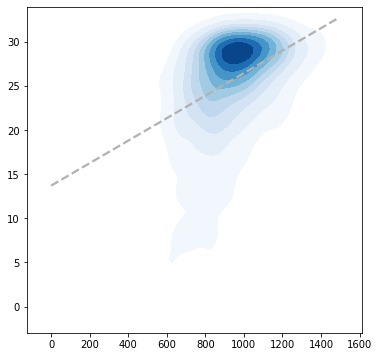

0.05097734967189485 0.004410053764035322


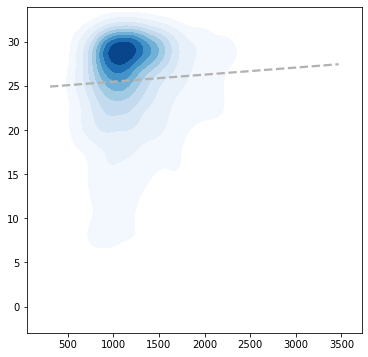

In [7]:
import importlib
import draw_results
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
importlib.reload(draw_results)

def z_score(values):
    return (values-np.mean(values))/ np.std(values)

cmap = plt.get_cmap('Blues')

roi_ids = ['79', '192']
MMSE_values = all_df['MMSE'].to_numpy()

line_kws = {'linestyle':'dashed'}

for roi_id in roi_ids:
    roi_values = all_df[roi_id].to_numpy()
    #draw_results.plot_correlation_joint(roi_values, MMSE_values, roi_id, 'MMSE')
    f, ax = plt.subplots(figsize=(6,6))
    r, p = pearsonr(roi_values, MMSE_values)
    print(r, p)
    ax = sns.kdeplot(x=roi_values, y=MMSE_values,fill=True, cmap=cmap,gridsize=100)
    sns.regplot(x=roi_values, y=MMSE_values,scatter=False,
                ci=None, ax=ax, color='#B2B2B2', line_kws=line_kws)
    plt.show()

0.4117124821542411 7.330723651845141e-128


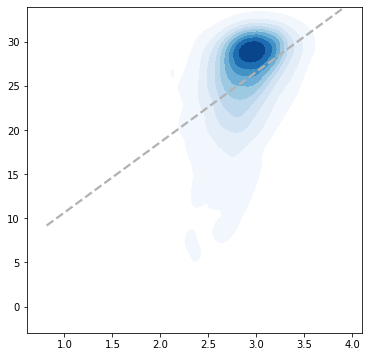

0.036219917126839175 0.04314139349521513


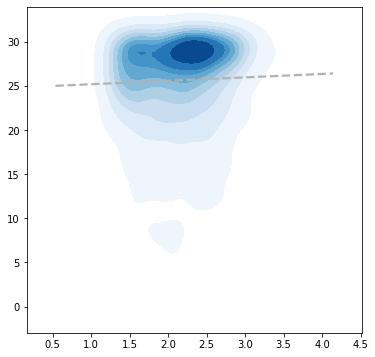

In [8]:
import importlib
import draw_results
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
importlib.reload(draw_results)

def z_score(values):
    return (values-np.mean(values))/ np.std(values)

cmap = plt.get_cmap('Blues')

roi_ids = ['175', '58']
MMSE_values = add_df_ct['MMSE'].to_numpy()

line_kws = {'linestyle':'dashed'}

for roi_id in roi_ids:
    roi_values = add_df_ct[roi_id].to_numpy()
    #draw_results.plot_correlation_joint(roi_values, MMSE_values, roi_id, 'MMSE')
    f, ax = plt.subplots(figsize=(6,6))
    r, p = pearsonr(roi_values, MMSE_values)
    print(r, p)
    ax = sns.kdeplot(x=roi_values, y=MMSE_values,fill=True, cmap=cmap,gridsize=100)
    sns.regplot(x=roi_values, y=MMSE_values,scatter=False,
                ci=None, ax=ax, color='#B2B2B2', line_kws=line_kws)
    plt.show()